Statistical models provide amazing tools to support an EDA. Perhaps the foremost statistical model is the `GLM`. In this notebook, we deep dive into GLM, exploring every worthwhile trait to sustain the statistical analysis. If GLM is a novelty, I recommend this article about MCGLM, written by me. https://jeancmaia.github.io/posts/tutorial-mcglm/tutorial_mcglm.html   

To leverage `GLM` in Python is plain and easy through statsmodels. https://www.statsmodels.org/stable/glm.html


For this research, we use the example dataset for the article.

In [35]:
import statsmodels.api as sm
import numpy as np

data = sm.datasets.scotland.load()

data.exog = sm.add_constant(data.exog)


gamma_model = sm.GLM(data.endog, data.exog, family=sm.families.Gamma())

gamma_results = gamma_model.fit()

/home/jean/.cache/pypoetry/virtualenvs/ml-review-GR21w9uC-py3.9/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


In [3]:
gamma_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    YES   No. Observations:                   32
Model:                            GLM   Df Residuals:                       24
Model Family:                   Gamma   Df Model:                            7
Link Function:          inverse_power   Scale:                       0.0035843
Method:                          IRLS   Log-Likelihood:                -83.017
Date:                Sat, 11 Mar 2023   Deviance:                     0.087389
Time:                        12:09:43   Pearson chi2:                   0.0860
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9800
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0178      0.011     -1.548      0.122      -0.040       0.005
COUTAX              4.962e-05   1.62e-05      3.060      0.002    1.78e-05    8.14e-05
UNEMPF                 0.0020      0.001      3.824      0.000       0.001       0.003
MOR                -7.181e-05   2.71e-05     -2.648      0.008      -0.000   -1.87e-05
ACT                    0.0001   4.06e-05      2.757      0.006    3.23e-05       0.000
GDP                -1.468e-07   1.24e-07     -1.187      0.235   -3.89e-07    9.56e-08
AGE                   -0.0005      0.000     -2.159      0.031      -0.001   -4.78e-05
COUTAX_FEMALEUNEMP -2.427e-06   7.46e-07     -3.253      0.001   -3.89e-06   -9.65e-07
======================================================================================
"""

The summary report of statsmodels is terrific for helping to understand the relation/association between covariates and the outcome variable. By the coef, we can assess how target behaves upon unitary changes, applied by the inverse of link function; the `inverse_power` in this adjustement. Another terrific trait is the hypothesis testing for covariates. The Wald test helps us assessing whether an explanatory variable is significant to the model. P-values higher than 0.025 are might be disposable for the model. https://www.statisticshowto.com/wald-test/. 

** Assessing linearity and Response distribution.

In [7]:
from statsmodels.graphics.api import abline_plot
import matplotlib.pyplot as plt

yhat = gamma_results.mu

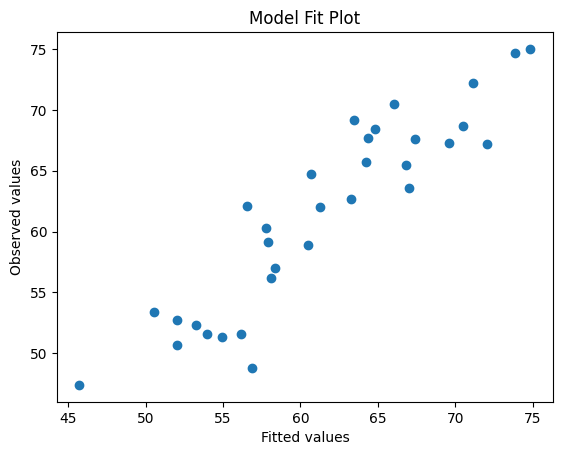

In [9]:
plt.scatter(yhat, data.endog)

plt.title('Model Fit Plot')
plt.ylabel('Observed values')
plt.xlabel('Fitted values');

Text(0.5, 0, 'Fitted values')

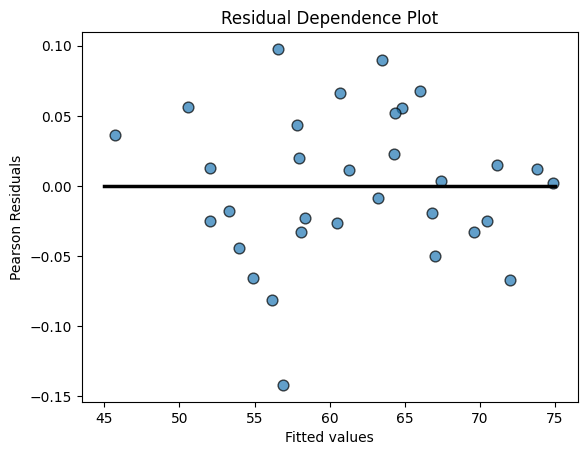

In [37]:
fig, ax = plt.subplots()

ax.scatter(yhat, gamma_results.resid_pearson, s=60, alpha=0.7, edgecolors="k")

slope, intercept = np.polyfit(yhat, gamma_results.resid_pearson, deg=1)
xseq = np.linspace(45, 75, num=100)

ax.plot(xseq, intercept + slope * xseq, color="k", lw=2.5)
ax.set_title('Residual Dependence Plot')
ax.set_ylabel('Pearson Residuals')
ax.set_xlabel('Fitted values')

As long as Pearson Residuals is evenly distributed throughout Fitted values and show no trend, we can assume that the problem is linearly separable under Gamma GLM assumptions.

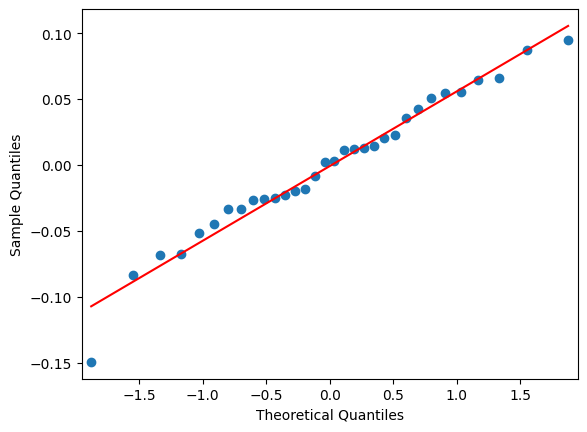

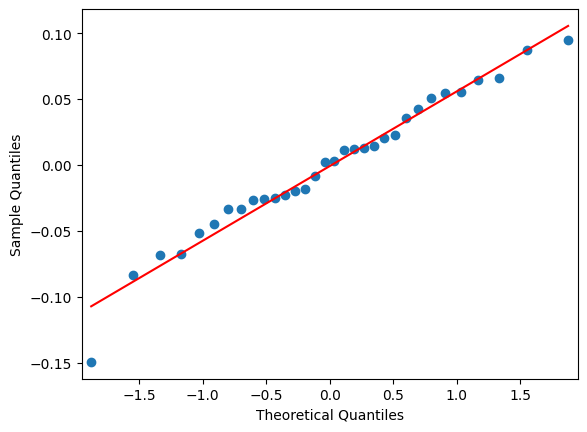

In [23]:
from statsmodels import graphics

resid = gamma_results.resid_deviance.copy()

graphics.gofplots.qqplot(resid, line='r')

Deviance residuals is gaussianly distributed, we might assume that Gamma model fits well to your response variable.

In [24]:
#https://bookdown.org/egarpor/PM-UC3M/glm-deviance.html
def r2glm(deviance, null_deviance):
    return 1 - deviance/null_deviance

print('R^2 of glm: ', r2glm(gamma_results.deviance, gamma_results.null_deviance))

R^2 of glm:  0.8369836451412519


https://boostedml.com/2019/03/linear-regression-plots-residuals-vs-leverage.html

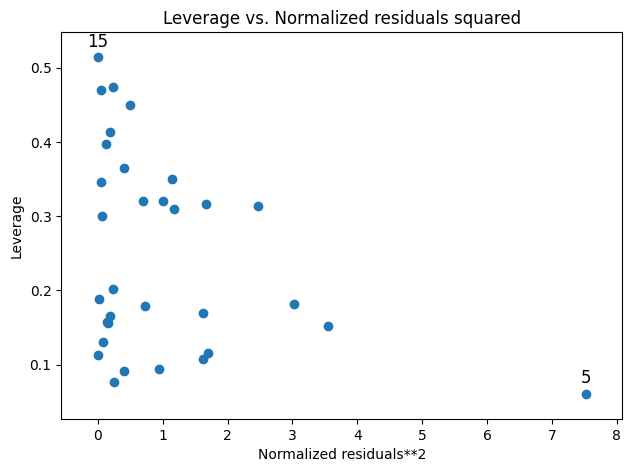

In [26]:
fig = sm.graphics.plot_leverage_resid2(gamma_results)
fig.tight_layout(pad=1.0)